# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص Blob</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Blob
گروهی از پیکسل‌های متصل در یک تصویر است که دارای ویژگی‌های مشترکی هستند (مثلاً مقدار مقیاس خاکستری)
<br />
این روش یک روشی متشکل از چند فاز پشت سر هم به شرح زیر است:
</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اما این الگوریتم چگونه کار میکند؟!</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"><br />
    <b>1 - آستانه گذاری:</b>
<br />
ابندا تصویر منبع را با آستانه گذاری در تصویر با آستانه هایی که از minThreshold شروع می شوند، به چندین تصویر باینری تبدیل میگردد.
<br />
این آستانه ها با thresholdStep تا maxThreshold افزایش می یابند.
<br />
برای مثال آستانه اول minThreshold، دومی minThreshold + thresholdStep، سومین آستانه minThreshold + 2 x thresholdStep و غیره است.
<br />
    <b>2 - گروه‌بندی :</b>
<br />
در هر تصویر باینری، پیکسل های سفید متصل با هم گروه بندی می شوند. که به آنها حباب یا Blob گفته میشود.
<br />
    <b>3 - ادغام: </b>
<br />
مراکز حباب‌های به دست آمده در تصاویر باینری محاسبه می‌شوند و حباب‌های نزدیک‌تر از پارامتر مشخص شده ی  minDistBetweenBlobs ادغام می‌شوند.
<br />
    <b>4 - محاسبه مرکز و شعاع:</b>
<br />
به عنوان نتیجه ی نهایی مراکز و شعاع حباب‌های ادغام شده جدید محاسبه شده و برگردانده می‌شوند.
</div>

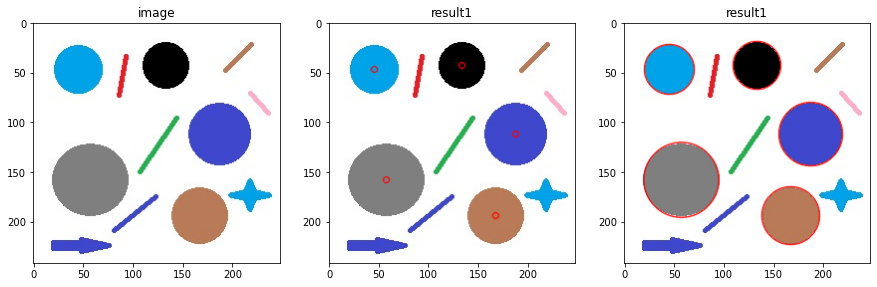

In [4]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("images/blob.jpg")

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()



detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result1 = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255))
result2 = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(132);plt.imshow(result1[...,::-1]);plt.title("result1");
plt.subplot(133);plt.imshow(result2[...,::-1]);plt.title("result1");

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">درک خروجی تابع detect</div>

In [2]:
for k in keypoints:
    print("point:", k.pt)
    print("point:", k.size)

point: (133.01858520507812, 43.01858901977539)
point: 48.077266693115234
point: (187.0471649169922, 112.04715728759766)
point: 63.91517639160156
point: (57.01155471801758, 158.0416259765625)
point: 75.37721252441406
point: (45.0250244140625, 47.0250244140625)
point: 50.042076110839844
point: (167.02386474609375, 194.0207977294922)
point: 57.99103546142578


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر کردن با مساحت</div>

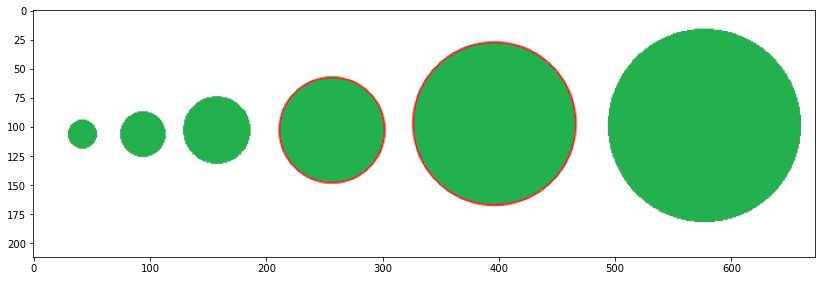

In [5]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("images/blob_size.jpg")

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Area.
params.filterByArea = True
params.minArea = 5000
params.maxArea = 20000


detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[14,8])
plt.imshow(result[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر کردن با میزان دایره بودن</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Circularity
 میزان نزدیک بودن شکل به شکل دایره را مشخص میکند.</div>

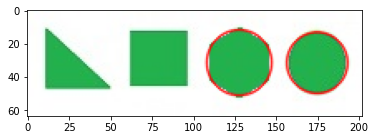

In [6]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("images/blob_Circularity.jpg")

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.84

detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر کردن با میزان محدب بودن اشکال</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Convexity
 میزان محدب بودن را مشخص میکند.</div>

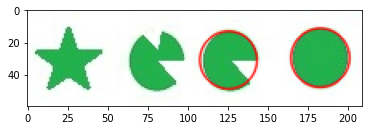

In [7]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("images/blob_convexity.jpg")

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.85

detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر کردن با Inertia</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Inertia
به عبارت ساده میزان کشیدگی شکل را مشخص میکند.</div>

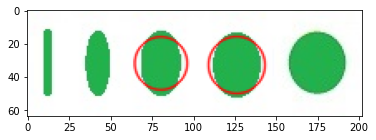

In [8]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("images/blob_inertia.jpg")

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.3
params.maxInertiaRatio = 0.7

detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر کردن با حد آستانه</div>


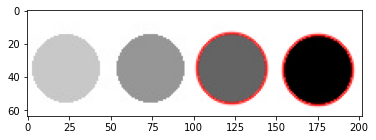

In [9]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("images/blob_Threshold.jpg")

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.maxThreshold = 150

detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

https://learnopencv.com/blob-detection-using-opencv-python-c/